## Import the necessary libraries

The first step is to import the necessary libraries.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Load the data

In [23]:
df = pd.read_csv('../data/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Processment

In [24]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

As we can see, the data does not have any missing values. However, the ID column is not necessary for the analysis, so we will remove it.

In [26]:
df = df.drop(["id"], axis=1)

## Catetorical Variables Encoding

The next step is to encode the categorical variables. For that, we will replace the values of the target variable (diagnosis) by 0 and 1, where 0 represents benign and 1 represents malignant.

All the data is numerical except for the target variable (diagnosis). Since we need to use this variable to train the model, we will encode it as well.



In [27]:
# Encode the diagnosis column
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Removing Outliers from the Dataset

The next step is to remove the outliers from the dataset. We will remove the records outside of the range of [mean - threshold * std, mean + threshold * std] for each feature. 

The thresold that will be used is 3, since it was the value that performed better.

In [28]:
outlier_threshold = 3
dropped = []
for col in df.loc[:, ~df.columns.isin(['diagnosis'])].columns:
    upper = df[col].mean() + outlier_threshold * df[col].std()
    lower = df[col].mean() - outlier_threshold * df[col].std()
    dropped.extend(df[(df[col] > upper) | (df[col] < lower)].index)
    df.drop(df[(df[col] > upper) | (df[col] < lower)].index, inplace=True)


print(f"Dropped {len(set(dropped))} outliers.")

Dropped 142 outliers.


## Analyzing the correlation between the diagnosis and the other variables

The next step is to analyze the correlation between the diagnosis and the other variables. For that, we will use the Pearson correlation coefficient, which measures the linear relationship between two variables. The Pearson correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.

diagnosis                  1.000000
area_worst                 0.796420
perimeter_worst            0.794675
radius_worst               0.787448
concave_points_mean        0.764965
concave_points_worst       0.746309
concavity_mean             0.739208
area_mean                  0.737194
perimeter_mean             0.733080
radius_mean                0.721529
area_se                    0.717007
concavity_worst            0.681057
radius_se                  0.603491
perimeter_se               0.602184
compactness_worst          0.535839
compactness_mean           0.528411
concave_points_se          0.420743
texture_worst              0.416089
concavity_se               0.382714
texture_mean               0.357771
smoothness_worst           0.345563
symmetry_worst             0.313028
compactness_se             0.265689
fractal_dimension_worst    0.250812
smoothness_mean            0.244806
symmetry_mean              0.215077
fractal_dimension_se       0.077631
texture_se                 0

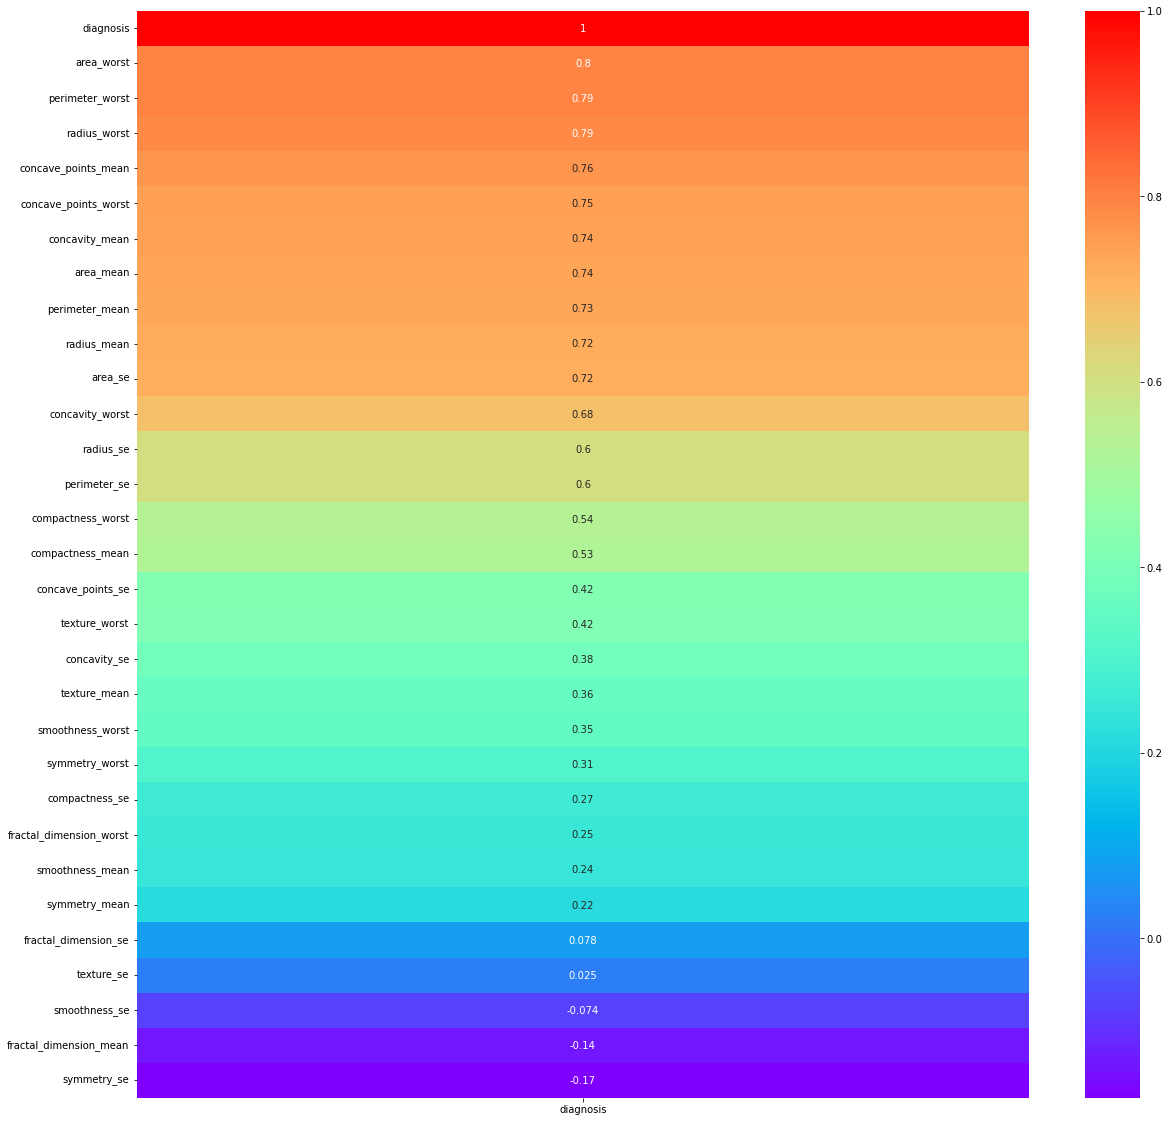

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), cbar=True, annot=True, cmap='rainbow')
print(df.corr()['diagnosis'].sort_values(ascending=False))
plt.show()



## Analyzing the correlation between the features

The next step is to analyze the correlation between the features. This is important because highly correlated features can lead to multicollinearity, which can affect the performance of the model. 

Same features are perfectly correlated, so we will apply a mask to hide the upper triangle of the correlation matrix in order to make it easier to visualize.

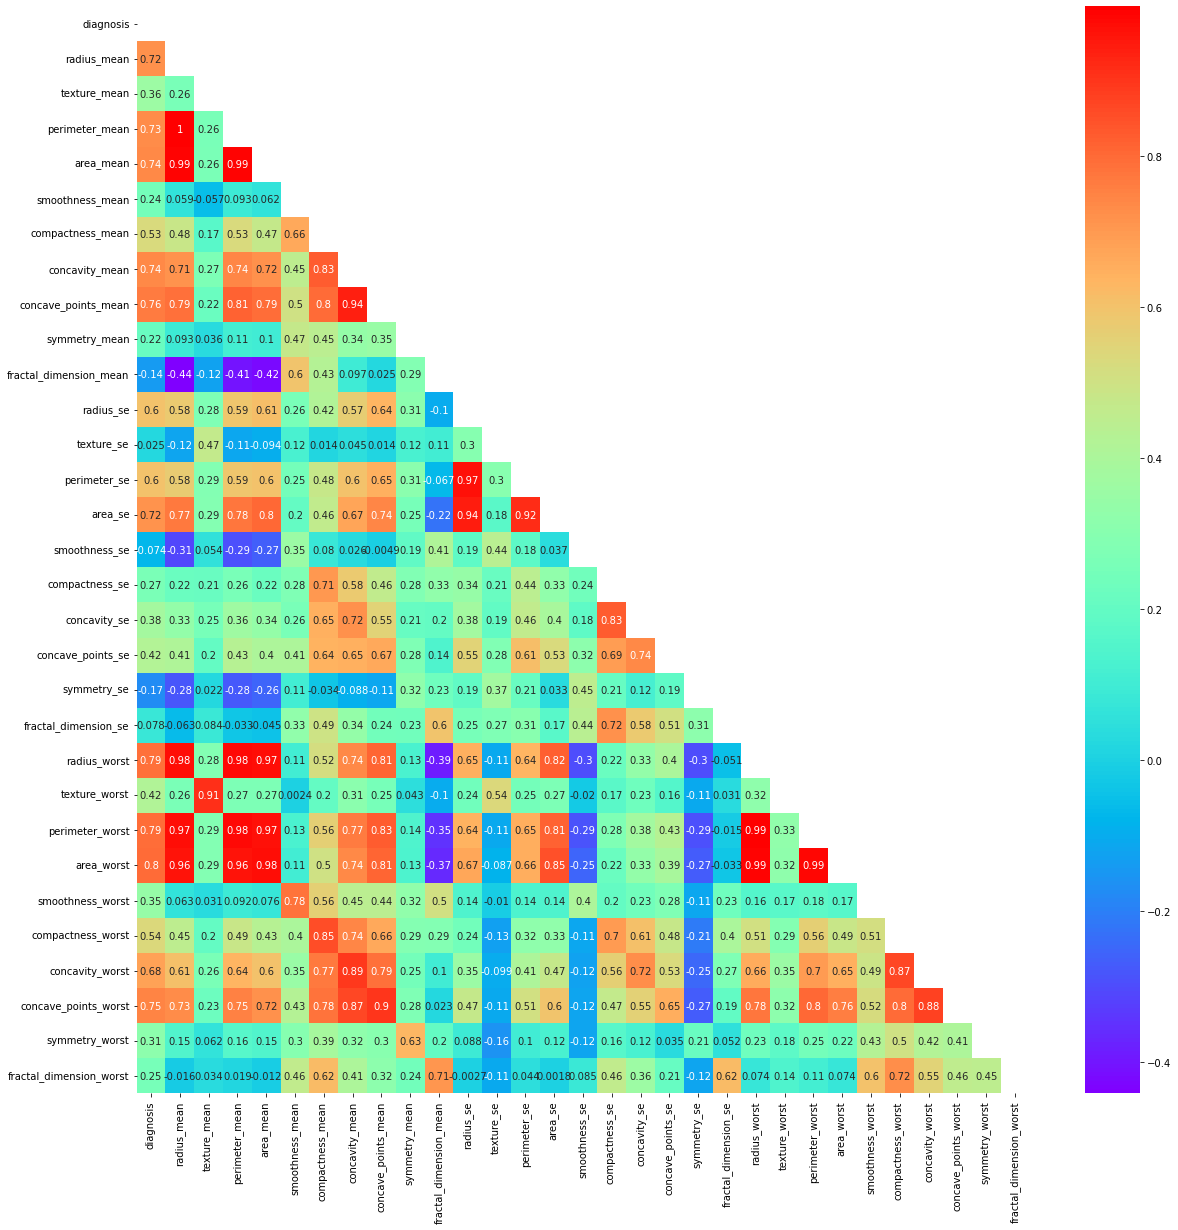

In [30]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cbar=True, annot=True, cmap='rainbow')

plt.show()

We can see that there are some features that are highly correlated with each other. Most of them were expected, such as perimeter_mean, area_mean, and radius_mean, which are all measures of the size of the tumor. 

In order to reduce the dimensionality of the data and avoid multicollinearity, we will remove some features that are highly correlated with each other since they provide similar information.

We will first list the most correlated features.

In [31]:
# Set the correlation threshold
threshold = 0.9

# Find the highly correlated features
highly_correlated = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Sort the highly correlated features by correlation coefficient
highly_correlated_sorted = sorted(highly_correlated, key=lambda x: abs(x[2]), reverse=True)

# Print the sorted highly correlated features
for feature1, feature2, correlation in highly_correlated_sorted:
    print(f"{feature1} and {feature2} have a correlation of {correlation:.2f}")


radius_mean and perimeter_mean have a correlation of 1.00
radius_worst and perimeter_worst have a correlation of 0.99
radius_mean and area_mean have a correlation of 0.99
radius_worst and area_worst have a correlation of 0.99
perimeter_mean and area_mean have a correlation of 0.99
perimeter_worst and area_worst have a correlation of 0.99
perimeter_mean and perimeter_worst have a correlation of 0.98
perimeter_mean and radius_worst have a correlation of 0.98
radius_mean and radius_worst have a correlation of 0.98
area_mean and area_worst have a correlation of 0.98
area_mean and radius_worst have a correlation of 0.97
radius_mean and perimeter_worst have a correlation of 0.97
area_mean and perimeter_worst have a correlation of 0.97
radius_se and perimeter_se have a correlation of 0.97
perimeter_mean and area_worst have a correlation of 0.96
radius_mean and area_worst have a correlation of 0.96
radius_se and area_se have a correlation of 0.94
concavity_mean and concave_points_mean have a c

# Merging of highly correlated features

Highly correlated features can be merged into a single feature to reduce the dimensionality of the data and avoid multicollinearity. This allows us to keep the most important information while reducing the number of features.

Considering this, we will be merging features whose correlation coefficient is greater than 0.9. 

In [32]:
highly_correlated_features = set()

# Step 1: Identify highly correlated features
for xi, yi in enumerate(corr_matrix.columns):
    for xj, yj in enumerate(corr_matrix.columns[:xi]):
        if abs(corr_matrix.iloc[xi, xj]) > threshold:
            highly_correlated_features.add(yi)
            highly_correlated_features.add(yj)

# Step 2: Create new column names for the merged columns using '|' as the delimiter
merged_cols = {}
for correlated_feature in highly_correlated_features:
    corr_cols = corr_matrix.index[corr_matrix[correlated_feature].abs() > threshold].tolist()
    if len(corr_cols) > 1:
        merged_col_name = '|'.join(sorted(corr_cols))
        merged_cols[merged_col_name] = corr_cols

# Step 3: Add new merged columns to the DataFrame
for merged_col, corr_features in merged_cols.items():
    if all(feature in df.columns for feature in corr_features):  # Ensure all features exist in df
        new_values = df[corr_features].mean(axis=1)
        df[merged_col] = new_values

# Step 4: Drop the original highly correlated features
df.drop(columns=highly_correlated_features, inplace=True)

print(f"Original number of features: {len(corr_matrix.columns)}")
print(f"Number of features after removing correlated features: {len(df.columns)}")


Original number of features: 31
Number of features after removing correlated features: 23


As we can see, some features were merged into a single feature. By analysing the new correlation matrix below, we can see that the number of features was reduced from 30 to 23 and we have less highly correlated features.

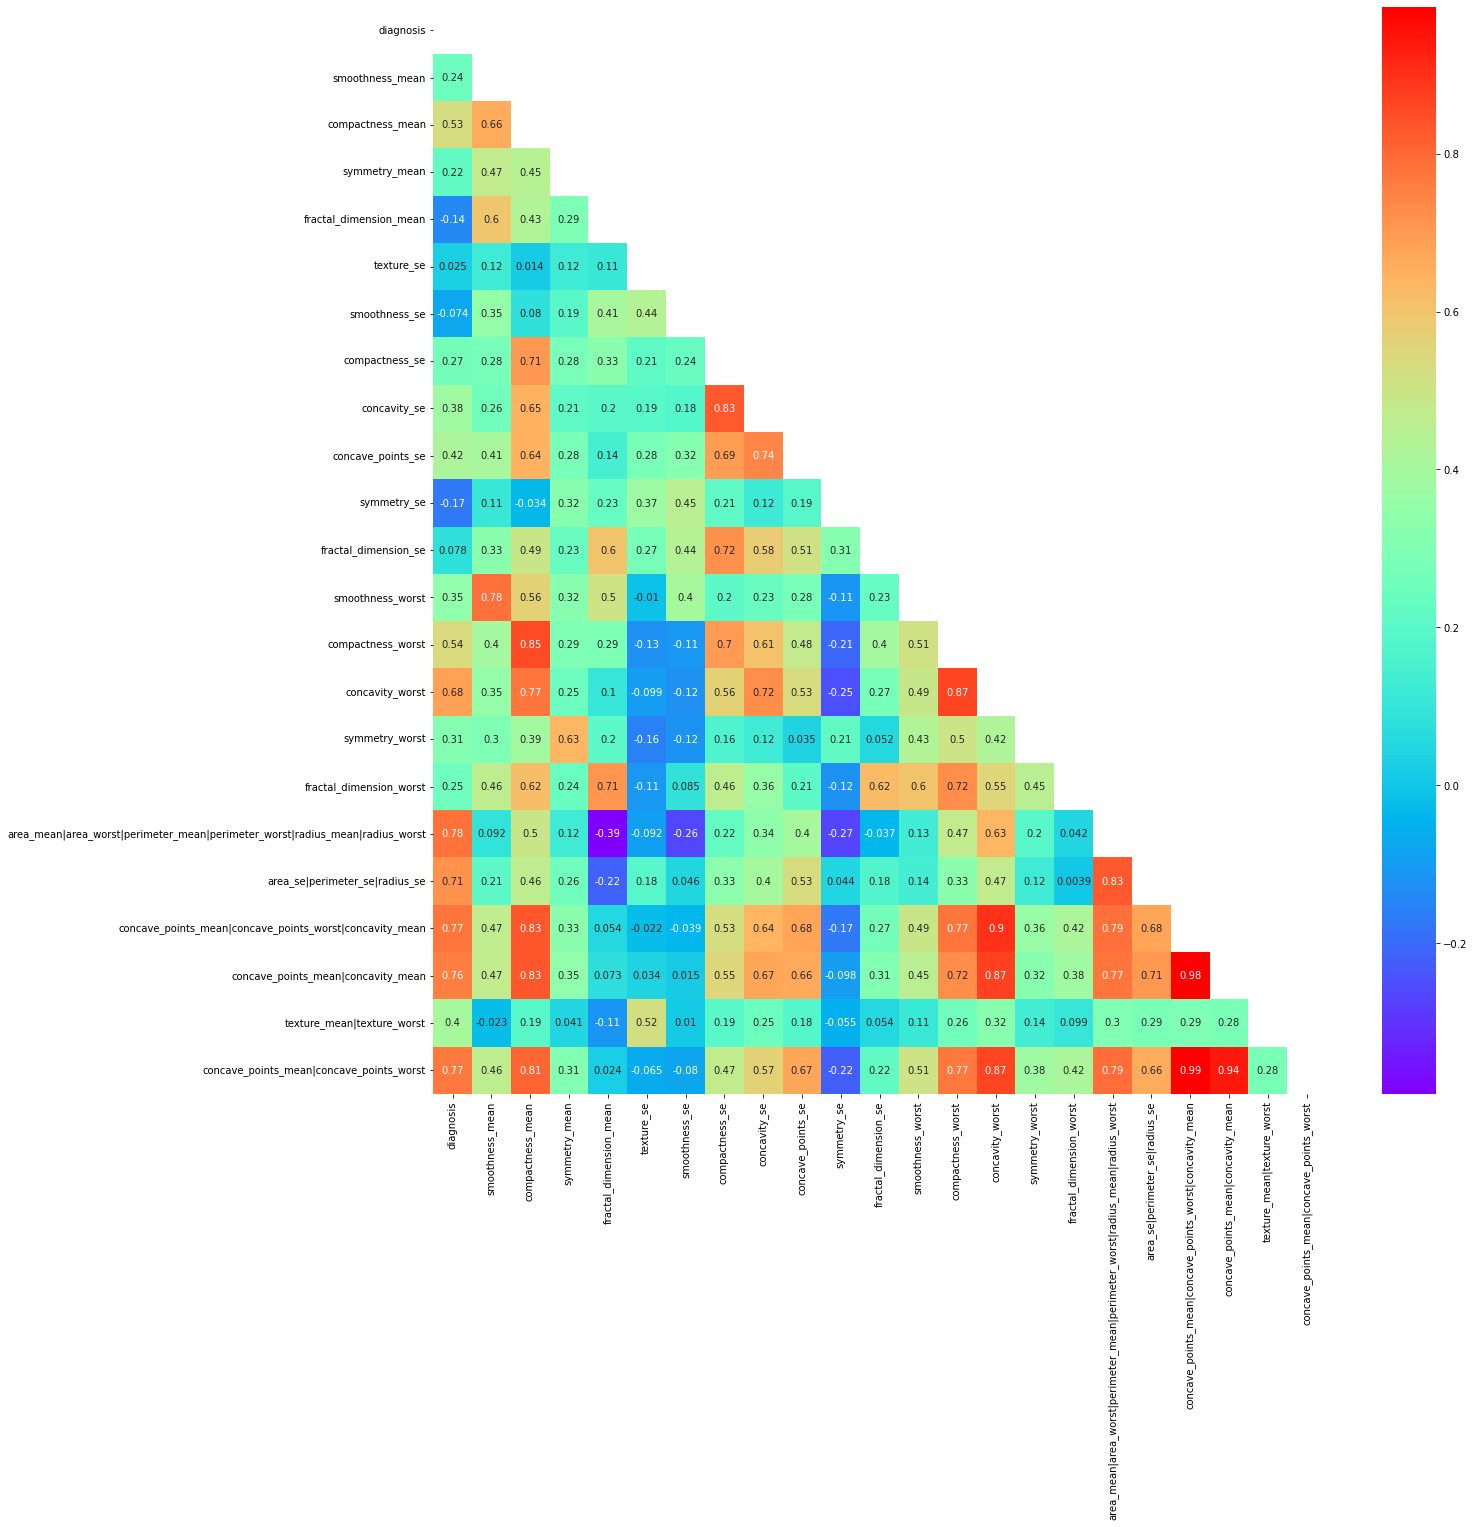

In [33]:
# Print the new correlation matrix
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cbar=True, annot=True, cmap='rainbow')
plt.show()

# Dataset Smote 

First of all, we will check the distribution of the target variable. As we can see, the dataset is unbalanced, with 314 benign cases and 113 malignant cases.

In [34]:
df['diagnosis'].value_counts()

diagnosis
0    314
1    113
Name: count, dtype: int64

Considering that there are more benign cases than malignant cases, we will use the SMOTE technique to balance the dataset. This technique creates synthetic samples of the minority class to balance the dataset. This is important so we can train the model with a balanced dataset and avoid bias towards the majority class.



In [35]:
from imblearn.over_sampling import SMOTE

x = df.drop(["diagnosis"], axis=1).values
y = df["diagnosis"].values

smote = SMOTE(random_state=1)
x_resample, y_resample = smote.fit_resample(x, y)

# Check new distribution
unique, count = np.unique(y_resample, return_counts=True)
y_resample_value_count = { k:v for (k,v) in zip(unique, count)}

print(y_resample_value_count)


{0: 314, 1: 314}


# Prepare the data for training



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

# Features: All columns except "diagnosis"
features = df.drop(["diagnosis"], axis=1)

# Target: "diagnosis" column
target = df["diagnosis"]

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



print(f"Training set size: {len(x_train)}")


Training set size: 341


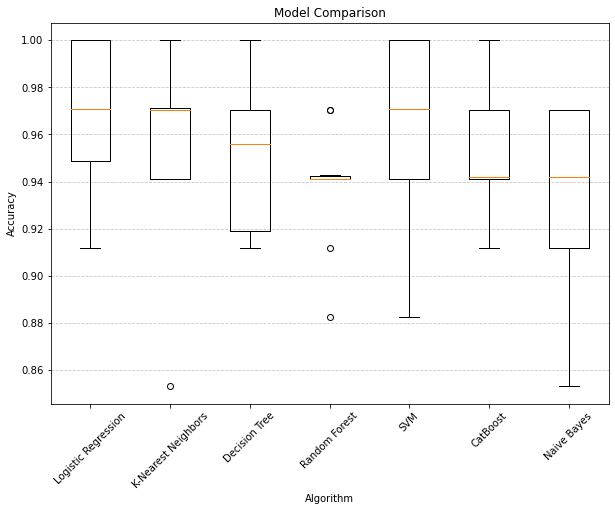

In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


def visualize_model_comparison(x_train, y_train):
    # Define models to compare
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('SVM', LinearSVC(max_iter=5000)),
        ('CatBoost', CatBoostClassifier(verbose=0)),
        ('Naive Bayes', GaussianNB())
    ]
    
    # Perform cross-validation and collect results
    best_model = None
    best_score = 0.0
    best_name = ""

    res = []
    algorithms = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        res.append(cv_results)
        algorithms.append(name)

        # Find the best model
        mean_score = np.mean(cv_results)
        
        if mean_score > best_score:
            best_score = mean_score
            best_model = model
            best_name = name

    
    # Plot the results
    plt.figure(figsize=(10, 7))
    plt.boxplot(res, labels=algorithms)
    plt.title('Model Comparison')
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return best_model, best_name

# Example usage:
best_model,best_name = visualize_model_comparison(x_train, y_train)

# Selecting the Best Model and Displaying the Confusion Matrix

Now, we will select the best-performing model based on the highest accuracy score and create a confusion matrix to further analyze its performance.

Let's proceed to the next section to implement this and visualize the confusion matrix for the best model.

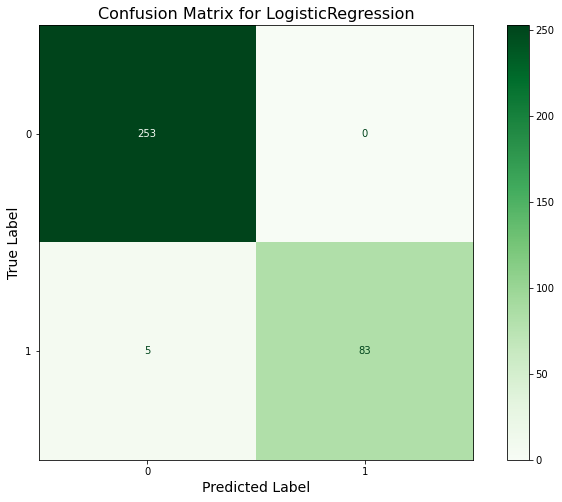

,precision,recall,f1-score,support
0,0.98,1.00,0.99,253
1,1.00,0.94,0.97,88
accuracy,0.99,0.99,0.99,0
macro avg,0.99,0.97,0.98,341
weighted avg,0.99,0.99,0.99,341


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from IPython.display import display

# Function to plot the confusion matrix with custom colors and larger size
def plot_confusion_matrix(model, x_train, y_train):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    cm = confusion_matrix(y_train, y_pred)
    
    fig, ax = plt.subplots(figsize=(12, 8))  # Increase the size of the plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, values_format='d', cmap=plt.cm.Greens)
    plt.title(f'Confusion Matrix for {type(model).__name__}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

# Example usage
plot_confusion_matrix(best_model, x_train, y_train)    



def display_classification_report(model, x_train, y_train):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    report = classification_report(y_train, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    # Round the results for better readability
    report_df['precision'] = report_df['precision'].round(2)
    report_df['recall'] = report_df['recall'].round(2)
    report_df['f1-score'] = report_df['f1-score'].round(2)
    report_df['support'] = report_df['support'].astype(int)
    
    display(report_df)

# Example usage
display_classification_report(best_model, x_train, y_train)

